In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [14]:
# Demographics remove phone calls, check-ins, get direction
demographics = pd.read_csv('Catholic Analytics/Facebook Insights Data Export - Roman Catholic Archdiocese of Singapore - 2021-02-14.csv', 
                           parse_dates = ['Date'], 
                           skiprows=[1])
demographics.info()
demographics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                166 non-null    datetime64[ns]
 1   Daily Reach Demographics - F.13-17  165 non-null    float64       
 2   Daily Reach Demographics - F.18-24  165 non-null    float64       
 3   Daily Reach Demographics - F.25-34  165 non-null    float64       
 4   Daily Reach Demographics - F.35-44  165 non-null    float64       
 5   Daily Reach Demographics - F.45-54  165 non-null    float64       
 6   Daily Reach Demographics - F.55-64  165 non-null    float64       
 7   Daily Reach Demographics - F.65+    165 non-null    float64       
 8   Daily Reach Demographics - M.13-17  165 non-null    float64       
 9   Daily Reach Demographics - M.18-24  165 non-null    float64       
 10  Daily Reach Demographics -

,Date,Daily Reach Demographics - F.13-17,Daily Reach Demographics - F.18-24,Daily Reach Demographics - F.25-34,Daily Reach Demographics - F.35-44,Daily Reach Demographics - F.45-54,Daily Reach Demographics - F.55-64,Daily Reach Demographics - F.65+,Daily Reach Demographics - M.13-17,Daily Reach Demographics - M.18-24,...,Daily Reach Demographics - M.45-54,Daily Reach Demographics - M.55-64,Daily Reach Demographics - M.65+,Daily Reach Demographics - U.13-17,Daily Reach Demographics - U.18-24,Daily Reach Demographics - U.25-34,Daily Reach Demographics - U.35-44,Daily Reach Demographics - U.45-54,Daily Reach Demographics - U.55-64,Daily Reach Demographics - U.65+
0,2020-08-31,19.0,253.0,1036.0,1808.0,1482.0,970.0,839.0,20.0,180.0,...,784,465.0,361.0,NaN,5.0,12.0,63.0,58.0,27.0,19.0
1,2020-09-01,16.0,177.0,804.0,1343.0,1090.0,772.0,668.0,14.0,155.0,...,646,402.0,327.0,NaN,3.0,9.0,40.0,50.0,24.0,17.0
2,2020-09-02,20.0,173.0,800.0,1266.0,1060.0,751.0,648.0,18.0,136.0,...,602,351.0,264.0,NaN,2.0,8.0,48.0,53.0,21.0,9.0
3,2020-09-03,16.0,180.0,769.0,1353.0,1051.0,709.0,590.0,12.0,137.0,...,653,395.0,256.0,NaN,2.0,10.0,50.0,50.0,26.0,13.0
4,2020-09-04,15.0,188.0,992.0,1597.0,1275.0,809.0,686.0,15.0,158.0,...,724,396.0,312.0,1.0,3.0,9.0,48.0,51.0,22.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2021-02-08,46.0,337.0,1416.0,2394.0,1818.0,1202.0,1031.0,31.0,267.0,...,896,598.0,402.0,2.0,4.0,24.0,71.0,84.0,29.0,15.0
162,2021-02-09,22.0,222.0,1121.0,1967.0,1599.0,1119.0,938.0,22.0,219.0,...,780,480.0,354.0,2.0,4.0,11.0,57.0,67.0,25.0,15.0
163,2021-02-10,25.0,254.0,1255.0,2199.0,1631.0,1051.0,900.0,21.0,215.0,...,849,486.0,403.0,1.0,5.0,15.0,63.0,74.0,32.0,15.0
164,2021-02-11,12.0,169.0,870.0,1405.0,1058.0,751.0,597.0,24.0,151.0,...,555,350.0,259.0,NaN,3.0,13.0,50.0,54.0,19.0,9.0


In [28]:
daily = pd.read_csv('Catholic Analytics/Facebook Daily Post Data - Roman Catholic Archdiocese of Singapore - 2021-02-14.csv',
                    parse_dates = ['Posted'], 
                    skiprows=[1])

# Select rows that are important
daily = daily.iloc[:,:10]

# Remove time information from Posted
daily['Posted'] = pd.to_datetime(daily['Posted'].dt.date)

daily

,Post ID,Permalink,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Engaged Users
0,207105879345208_3707973942591700,https://www.facebook.com/Catholic.Sg/photos/a....,"Lord Jesus, reveal me to myself today so that ...",Photo,2021-02-14,1791,1823,1791,1791,113
1,207105879345208_3707105806011847,https://www.facebook.com/Catholic.Sg/posts/370...,It's been a year since masses were suspended o...,Link,2021-02-14,3150,3150,3227,3227,269
2,207105879345208_3706958396026588,https://www.facebook.com/Catholic.Sg/posts/370...,The real Temple is not the building per se but...,Video,2021-02-14,1396,1396,1431,1431,82
3,207105879345208_3706218709433890,https://www.facebook.com/Catholic.Sg/posts/370...,🌟 𝟮𝟬𝟮𝟭: 𝗧𝗵𝗲 𝗬𝗲𝗮𝗿 𝘁𝗼 𝗜𝗴𝗻𝗶𝘁𝗲 𝗮𝗻𝗱 𝗦𝗵𝗶𝗻𝗲 𝘄𝗶𝘁𝗵 𝗙𝗮𝗶𝘁...,Video,2021-02-13,6848,6848,6861,6861,518
4,207105879345208_851529668724727,https://www.facebook.com/Catholic.Sg/videos/85...,Join us for our mass webcast: https://youtu.be...,Video,2021-02-13,4315,4315,4463,4463,699
...,...,...,...,...,...,...,...,...,...,...
495,207105879345208_3294852277237204,https://www.facebook.com/Catholic.Sg/posts/329...,Grieving the loss of a child? \n\nGreg and Eli...,Link,2020-09-14,5715,5715,6154,6154,408
496,207105879345208_3287948047927627,https://www.facebook.com/Catholic.Sg/photos/a....,24th Sunday in Ordinary Time\nMatthew 18:21-35...,Photo,2020-09-12,4053,4053,4494,4494,155
497,207105879345208_3269480823107683,https://www.facebook.com/Catholic.Sg/photos/a....,"Be with us, Lord, as we take up our daily task...",Photo,2020-09-06,11259,11259,12483,12483,775
498,207105879345208_3266385580083874,https://www.facebook.com/Catholic.Sg/photos/a....,23rd Sunday in Ordinary Time\nMatthew 18:15-20...,Photo,2020-09-05,5331,5331,5766,5766,278


In [32]:
# Problem is that daily data is of ALL posts, not just the ones that have been posted on that
# day

# Merge the two datasets - note that demographics doesn't have data from the last two 
# days due to data lag
merged_df = pd.merge(daily, demographics, left_on = ['Posted'], right_on=['Date'], how = 'left')

In [38]:
# Grab only the results that have data for that day (aka remove the last two days of data)
merged_df[~merged_df['Date'].isna()]

,Post ID,Permalink,Post Message,Type,Posted,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Engaged Users,...,Daily Reach Demographics - M.45-54,Daily Reach Demographics - M.55-64,Daily Reach Demographics - M.65+,Daily Reach Demographics - U.13-17,Daily Reach Demographics - U.18-24,Daily Reach Demographics - U.25-34,Daily Reach Demographics - U.35-44,Daily Reach Demographics - U.45-54,Daily Reach Demographics - U.55-64,Daily Reach Demographics - U.65+
9,207105879345208_3703354199720341,https://www.facebook.com/Catholic.Sg/photos/a....,🌟 𝟮𝟬𝟮𝟭: 𝗧𝗵𝗲 𝗬𝗲𝗮𝗿 𝘁𝗼 𝗜𝗴𝗻𝗶𝘁𝗲 𝗮𝗻𝗱 𝗦𝗵𝗶𝗻𝗲 𝘄𝗶𝘁𝗵 𝗙𝗮𝗶𝘁...,Photo,2021-02-12,1556,1556,1573,1573,32,...,453.0,302.0,222.0,1.0,2.0,9.0,43.0,46.0,13.0,8.0
10,207105879345208_3702825269773234,https://www.facebook.com/Catholic.Sg/posts/370...,7. Mary As Mother Listens to Us\nA true mother...,Link,2021-02-12,4150,4150,4212,4212,254,...,453.0,302.0,222.0,1.0,2.0,9.0,43.0,46.0,13.0,8.0
11,207105879345208_3700895716632856,https://www.facebook.com/Catholic.Sg/posts/370...,Still affected by your 𝗽𝗮𝘀𝘁?\n\nGod enters int...,Link,2021-02-11,3612,3612,3646,3646,126,...,555.0,350.0,259.0,NaN,3.0,13.0,50.0,54.0,19.0,9.0
12,207105879345208_3700350433354051,https://www.facebook.com/Catholic.Sg/posts/370...,Scripture does not record any words this incre...,Link,2021-02-11,2980,2980,3046,3046,133,...,555.0,350.0,259.0,NaN,3.0,13.0,50.0,54.0,19.0,9.0
13,207105879345208_3699994240056337,https://www.facebook.com/Catholic.Sg/posts/369...,"If families, Church, society and the world are...",Video,2021-02-11,3225,3225,3411,3411,140,...,555.0,350.0,259.0,NaN,3.0,13.0,50.0,54.0,19.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,207105879345208_3294852277237204,https://www.facebook.com/Catholic.Sg/posts/329...,Grieving the loss of a child? \n\nGreg and Eli...,Link,2020-09-14,5715,5715,6154,6154,408,...,2311.0,1391.0,999.0,NaN,6.0,29.0,136.0,123.0,63.0,53.0
496,207105879345208_3287948047927627,https://www.facebook.com/Catholic.Sg/photos/a....,24th Sunday in Ordinary Time\nMatthew 18:21-35...,Photo,2020-09-12,4053,4053,4494,4494,155,...,1166.0,677.0,473.0,2.0,2.0,16.0,97.0,89.0,45.0,20.0
497,207105879345208_3269480823107683,https://www.facebook.com/Catholic.Sg/photos/a....,"Be with us, Lord, as we take up our daily task...",Photo,2020-09-06,11259,11259,12483,12483,775,...,877.0,494.0,355.0,NaN,2.0,17.0,74.0,57.0,25.0,16.0
498,207105879345208_3266385580083874,https://www.facebook.com/Catholic.Sg/photos/a....,23rd Sunday in Ordinary Time\nMatthew 18:15-20...,Photo,2020-09-05,5331,5331,5766,5766,278,...,852.0,469.0,335.0,1.0,2.0,13.0,61.0,64.0,36.0,14.0


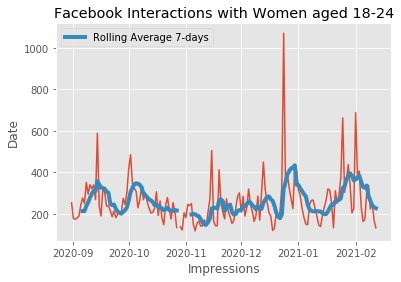

In [53]:
# Unusual spike on 14/09/2020
plt.plot(demographics['Date'], demographics['Daily Reach Demographics - F.18-24'])
plt.plot(demographics['Date'], 
         demographics['Daily Reach Demographics - F.18-24'].rolling(window = 7).mean(), 
        linewidth = 4, label = 'Rolling Average 7-days')
plt.title('Facebook Interactions with Women aged 18-24')
plt.legend()
plt.xlabel('Impressions')
plt.ylabel('Date')
plt.show()

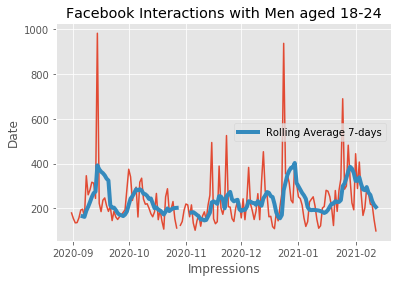

In [54]:
plt.plot(demographics['Date'], demographics['Daily Reach Demographics - M.18-24'])
plt.plot(demographics['Date'], 
         demographics['Daily Reach Demographics - M.18-24'].rolling(window = 7).mean(), 
        linewidth = 4, label = 'Rolling Average 7-days')
plt.title('Facebook Interactions with Men aged 18-24')
plt.legend()
plt.xlabel('Impressions')
plt.ylabel('Date')
plt.show()
plt.show()

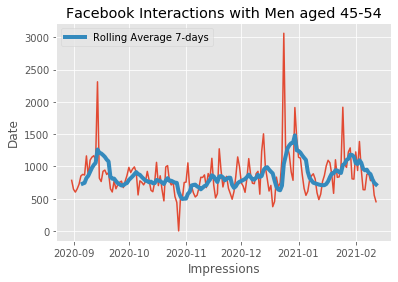

In [58]:
plt.plot(demographics['Date'], demographics['Daily Reach Demographics - M.45-54'])
plt.plot(demographics['Date'], 
         demographics['Daily Reach Demographics - M.45-54'].rolling(window = 7).mean(), 
        linewidth = 4, label = 'Rolling Average 7-days')
plt.title('Facebook Interactions with Men aged 45-54')
plt.legend()
plt.xlabel('Impressions')
plt.ylabel('Date')
plt.show()
plt.show()

In [65]:
merged_df[merged_df['Posted'] == '2020-09-14']['Post Message'].to_list()

['Grieving the loss of a child? \n\nGreg and Elizabeth Krygsman lost their 24-year-old son suddenly in 2015. They were blessed to have family and friends come together to help with the arrangements for sending Andrew off. Yet, despite the support the couple received, they realised that they needed a deeper level of accompaniment as they grappled with questions about their loss.\n\n“In our search, the Holy Spirit led us to find Valerie and Audrey, who provided the community support and shared experience that we needed in our grief journey,” said Elizabeth.\n\n“We’re all still healing; we’re not there yet,” said Audrey. “I’d stopped talking to God. I was just physically in church. But God has been slowly reeling me back in.”\n\nAs a community, let us spread the word about these courageous people and pray for them and their mission.']

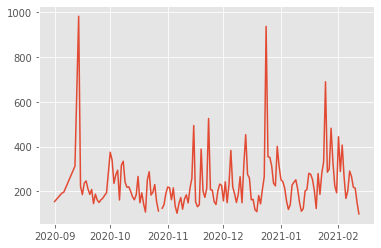

In [66]:
# Looks not bad - we can see certain spikes like Christmas and New Year
# Try doing some KMeans on post message to see if there are patterns behind spikes.